# Péter és a farkas: Bevezetés a megerősítéses tanulásba

Ebben az oktatóanyagban megtanuljuk, hogyan alkalmazzuk a megerősítéses tanulást egy útvonal-keresési problémára. A helyzetet [Péter és a farkas](https://en.wikipedia.org/wiki/Peter_and_the_Wolf) című zenés mese ihlette, amelyet az orosz zeneszerző, [Szergej Prokofjev](https://en.wikipedia.org/wiki/Sergei_Prokofiev) alkotott. Ez egy történet a fiatal pionírról, Péterről, aki bátran elhagyja otthonát, hogy az erdei tisztáson üldözőbe vegyen egy farkast. Gépi tanulási algoritmusokat fogunk betanítani, amelyek segítenek Péternek felfedezni a környező területet és egy optimális navigációs térképet készíteni.

Először importáljunk néhány hasznos könyvtárat:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## A megerősítéses tanulás áttekintése

A **megerősítéses tanulás** (RL) egy olyan tanulási technika, amely lehetővé teszi számunkra, hogy egy **ügynök** optimális viselkedését tanuljuk meg egy adott **környezetben**, számos kísérlet futtatásával. Az ügynöknek ebben a környezetben kell, hogy legyen valamilyen **célja**, amelyet egy **jutalomfüggvény** határoz meg.

## A környezet

Egyszerűség kedvéért tekintsük Péter világát egy `width` x `height` méretű négyzet alakú táblának. A tábla minden cellája lehet:
* **talaj**, amin Péter és más lények sétálhatnak
* **víz**, amin nyilvánvalóan nem lehet sétálni
* **fa** vagy **fű** - egy hely, ahol meg lehet pihenni
* **alma**, amely valami olyasmit jelképez, amit Péter örömmel találna meg, hogy táplálkozhasson
* **farkas**, amely veszélyes, és el kell kerülni

A környezettel való munka érdekében definiálunk egy `Board` nevű osztályt. Annak érdekében, hogy ne zsúfoljuk túl ezt a jegyzetfüzetet, az összes, a táblával kapcsolatos kódot egy külön `rlboard` modulba helyeztük át, amelyet most importálunk. Ha szeretnéd, megtekintheted ennek a modulnak a belső működését, hogy részletesebb információkat kapj az implementációról.


Most hozzunk létre egy véletlenszerű táblát, és nézzük meg, hogyan néz ki:


In [4]:
# code block 1

## Műveletek és Szabályok

Példánkban Péter célja az lenne, hogy találjon egy almát, miközben elkerüli a farkast és más akadályokat. Határozzuk meg ezeket a műveleteket egy szótárként, és rendeljük hozzájuk a megfelelő koordinátaváltozások párosait.


In [5]:
# code block 2

Ügynökünk (Péter) stratégiáját egy úgynevezett **politika** határozza meg. Vegyük szemügyre a legegyszerűbb politikát, amelyet **véletlenszerű sétának** nevezünk.

## Véletlenszerű séta

Először oldjuk meg a problémánkat egy véletlenszerű séta stratégia megvalósításával.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## Jutalomfüggvény

Ahhoz, hogy a stratégiánk intelligensebb legyen, meg kell értenünk, mely lépések "jobbak", mint mások.


In [8]:
#code block 5

## Q-Learning

Hozzunk létre egy Q-táblát, vagyis egy többdimenziós tömböt. Mivel a táblánk mérete `szélesség` x `magasság`, a Q-táblát egy numpy tömbbel ábrázolhatjuk, amelynek alakja `szélesség` x `magasság` x `len(actions)`:


In [9]:
# code block 6

Adja át a Q-táblát a `plot` függvénynek, hogy megjelenítse a táblát a táblán:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## A Q-Learning lényege: Bellman-egyenlet és tanulási algoritmus

Írjunk álpseudokódot a tanulási algoritmusunkhoz:

* Inicializáljuk a Q-táblát Q azonos értékekkel minden állapothoz és cselekvéshez
* Állítsuk be a tanulási rátát $\alpha\leftarrow 1$
* Ismételjük meg a szimulációt sokszor
   1. Kezdjünk véletlenszerű pozícióban
   1. Ismételjük
        1. Válasszunk egy cselekvést $a$ az állapotban $s$
        2. Hajtsuk végre a cselekvést, és lépjünk egy új állapotba $s'$
        3. Ha elérjük a játék végét, vagy a teljes jutalom túl kicsi - lépjünk ki a szimulációból  
        4. Számítsuk ki a jutalmat $r$ az új állapotban
        5. Frissítsük a Q-függvényt a Bellman-egyenlet szerint: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. Frissítsük a teljes jutalmat, és csökkentsük $\alpha$ értékét.

## Kihasználás vs. Felfedezés

A legjobb megközelítés az, ha egyensúlyt teremtünk a felfedezés és a kihasználás között. Ahogy egyre többet tanulunk a környezetünkről, valószínűbb, hogy az optimális útvonalat követjük, azonban időnként érdemes az ismeretlen utat választani.

## Python Implementáció

Most készen állunk a tanulási algoritmus megvalósítására. Előtte szükségünk van egy olyan függvényre, amely a Q-táblában lévő tetszőleges számokat átalakítja a megfelelő cselekvések valószínűségi vektorává:


In [10]:
# code block 7

Egy kis mennyiségű `eps`-t adunk az eredeti vektorhoz, hogy elkerüljük a nullával való osztást az első esetben, amikor a vektor összes komponense azonos.

A tényleges tanulási algoritmust 5000 kísérletre futtatjuk, amelyeket **epochoknak** is nevezünk:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

Az algoritmus végrehajtása után a Q-táblázatot frissíteni kell olyan értékekkel, amelyek meghatározzák az egyes lépésekben végrehajtható különböző akciók vonzerejét. Itt jelenítse meg a táblázatot:


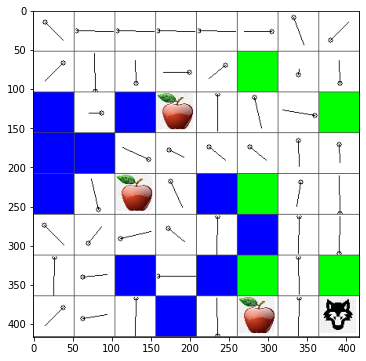

In [43]:
m.plot(Q)

## A szabályzat ellenőrzése

Mivel a Q-Table felsorolja az egyes állapotokban az egyes cselekvések "vonzóságát", nagyon egyszerű ezt felhasználni a hatékony navigáció meghatározására a világunkban. A legegyszerűbb esetben egyszerűen kiválaszthatjuk azt a cselekvést, amely a legmagasabb Q-Table értékhez tartozik:


In [13]:
# code block 9

2

Ha többször futtatod a fenti kódot, észreveheted, hogy néha egyszerűen "lefagy", és meg kell nyomnod a STOP gombot a notebookban, hogy megszakítsd.

> **1. feladat:** Módosítsd a `walk` függvényt úgy, hogy korlátozza az útvonal maximális hosszát egy bizonyos lépésszámmal (például 100), és figyeld meg, hogy a fenti kód időnként visszaadja ezt az értéket.

> **2. feladat:** Módosítsd a `walk` függvényt úgy, hogy ne térjen vissza olyan helyekre, ahol már korábban járt. Ez megakadályozza, hogy a `walk` ciklusba kerüljön, azonban az ügynök még mindig "csapdába" eshet egy olyan helyen, ahonnan nem tud kijutni.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


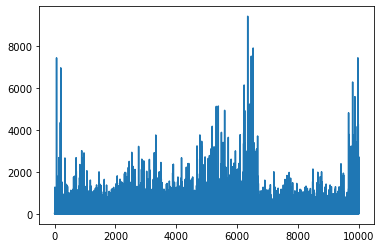

In [57]:
plt.plot(lpath)

## Gyakorlat
## Egy életszerűbb Péter és a farkas világ



---

**Felelősségkizárás**:  
Ez a dokumentum az [Co-op Translator](https://github.com/Azure/co-op-translator) AI fordítási szolgáltatás segítségével készült. Bár törekszünk a pontosságra, kérjük, vegye figyelembe, hogy az automatikus fordítások hibákat vagy pontatlanságokat tartalmazhatnak. Az eredeti dokumentum az eredeti nyelvén tekintendő hiteles forrásnak. Kritikus információk esetén javasolt professzionális, emberi fordítást igénybe venni. Nem vállalunk felelősséget a fordítás használatából eredő félreértésekért vagy téves értelmezésekért.
